Rong Wang rongwww 1619779944

<b>1. Supervised, Semi-Supervised, and Unsupervised Learning</b>

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.


In [244]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, auc
from statistics import mean
import matplotlib.pyplot as plt
from scipy.spatial import distance
from collections import Counter
from sklearn.cluster import SpectralClustering
import random
import warnings
# from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')

In [245]:
dataset = pd.read_csv('../data/wdbc.data', header=None)
dataset = dataset.iloc[:, 1:]  # delete col ID.
dataset.replace('M', 1, inplace=True)  # Malignant
dataset.replace('B', 0, inplace=True)  # Benign
dataset

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.

In [246]:
# References: 
# https://www.activestate.com/resources/quick-reads/how-to-slice-a-dataframe-in-pandas/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://pandas.pydata.org/docs/user_guide/merging.html

dataset_pos = dataset[dataset[1]==1]
dataset_neg = dataset[dataset[1]==0]
print("maligannt (pos) data: {}".format(dataset_pos.shape[0]))
print("Benign (neg) data: {}".format(dataset_neg.shape[0]))

X_pos = dataset_pos.iloc[:, 1:]
y_pos = dataset_pos.iloc[:, 0]
X_neg = dataset_neg.iloc[:, 1:]
y_neg = dataset_neg.iloc[:, 0]

y_pos

maligannt (pos) data: 212
Benign (neg) data: 357


0      1
1      1
2      1
3      1
4      1
      ..
563    1
564    1
565    1
566    1
567    1
Name: 1, Length: 212, dtype: int64

In [247]:
def split_data_1bi():
    X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.2, random_state=42)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.2, random_state=42)

    # use 20% of both the positve and negative classes as the test set
    X_train_concat = [X_train_pos, X_train_neg]
    X_train = pd.concat(X_train_concat)
    y_train_concat = [y_train_pos, y_train_neg]
    y_train = pd.concat(y_train_concat)

    X_test_concat = [X_test_pos, X_test_neg]
    X_test = pd.concat(X_test_concat)
    y_test_concat = [y_test_pos, y_test_neg]
    y_test = pd.concat(y_test_concat)
    
    return X_train, X_test, y_train, y_test

# X_train_pos, X_test_pos, y_train_pos, y_test_pos, X_train_neg, X_test_neg, y_train_neg, y_test_neg, X_train, X_test, y_train, y_test
# 169*30     43*30       169*1        43*1        285*30       72*30       285*1        72*1        454*30   115*30  454*1    115*1


In [248]:
def plot_ROC(y_true, y_pred, title): # title: string
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

i. <b>Supervised Learning:</b> Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



For train set, over 30 runs.
Average accuracy:  0.973568281938326
Average precision:  0.9700598802395209
Average recall:  0.9585798816568047
Average F1_score:  0.9642857142857144
Average AUC:  0.9964296342433994

For test set, over 30 runs.
Average accuracy:  0.9217391304347826
Average precision:  0.8541666666666666
Average recall:  0.9534883720930233
Average F1_score:  0.9010989010989011
Average AUC:  0.9932170542635659

Train confusion matrix:
 [[280   5]
 [  7 162]]


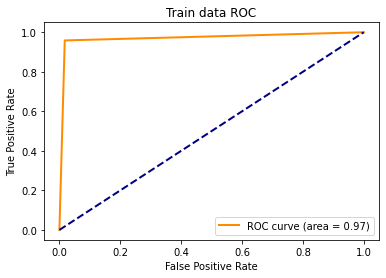


Test confusion matrix:
 [[65  7]
 [ 2 41]]


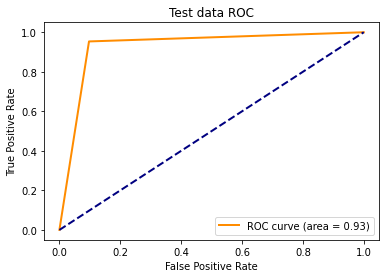

In [249]:
# References: 
# https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
# https://www.journaldev.com/45109/normalize-data-in-python
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
# https://trenton3983.github.io/files/projects/2020-10-14_supervised_learning_sklearn/2020-10-14_supervised_learning_sklearn.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
# https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
# https://www.geeksforgeeks.org/find-average-list-python/
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

cRange = np.logspace(-1, 7, 5)
parameters = {'C': cRange}
svc_L1 = LinearSVC(penalty='l1', dual=False, max_iter = 100000)
accuracy_train, precision_train, recall_train, F1_score_train, AUC_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, F1_score_test, AUC_test = [], [], [], [], []

for i in range(30):
    # random split and normalize data
    X_train, X_test, y_train, y_test = split_data_1bi()
    X_train = preprocessing.normalize(X_train)
    X_train = pd.DataFrame(X_train)
    X_test = preprocessing.normalize(X_test)
    X_test = pd.DataFrame(X_test)
    
    # Train an L1-penalized SVM to classify the data. 
    # Use 5 fold cross-validation to choose the penalty parameter.
    clf = GridSearchCV(svc_L1, parameters, cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    c = clf.best_params_['C']
    svc = LinearSVC(penalty='l1', C=c, dual=False, max_iter = 10000).fit(X_train, y_train)
    y_pred = pd.DataFrame(svc.predict(X_test))
    y_pred_train = pd.DataFrame(svc.predict(X_train))

    # Record accuracy, precision, recall, F1-score, and AUC, for both training and test sets.
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    precision_train.append(precision_score(y_train, y_pred_train))
    recall_train.append(recall_score(y_train, y_pred_train))
    F1_score_train.append(f1_score(y_train, y_pred_train))
    AUC_train.append(roc_auc_score(y_train, svc.decision_function(X_train)))
    
    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    F1_score_test.append(f1_score(y_test, y_pred))
    AUC_test.append(roc_auc_score(y_test, svc.decision_function(X_test)))
    
    
# print(accuracy_train, precision_train, recall_train, F1_score_train, AUC_train)
# print(accuracy_test, precision_test, recall_test, F1_score_test, AUC_test) 

# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.
print("\nFor train set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_train))
print("Average precision: ", mean(precision_train)) 
print("Average recall: ", mean(recall_train)) 
print("Average F1_score: ", mean(F1_score_train)) 
print("Average AUC: ", mean(AUC_train)) 

print("\nFor test set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_test))
print("Average precision: ", mean(precision_test)) 
print("Average recall: ", mean(recall_test)) 
print("Average F1_score: ", mean(F1_score_test)) 
print("Average AUC: ", mean(AUC_test)) 

# Plot the ROC and report the confusion matrix for training of the last run.
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)  # y_pred_train of the last run
print("\nTrain confusion matrix:\n", conf_matrix)
plot_ROC(y_train, y_pred_train, "Train data ROC")

# Plot the ROC and report the confusion matrix for testing of the last run.
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=y_pred)  # y_pred of the last run
print("\nTest confusion matrix:\n", conf_matrix_test)
plot_ROC(y_test, y_pred, "Test data ROC")

<b>ii. Semi-Supervised Learning/ Self-training:</b> select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [250]:
# Train an L1-penalized SVM to classify the labeled data. Use normalized data. 
# Choose the penalty parameter using 5 fold cross validation.
def svm_1biia(svc_L1, parameters, X_train, y_train):
    clf = GridSearchCV(svc_L1, parameters, cv=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    c = clf.best_params_['C']
    svc = LinearSVC(penalty='l1', C=c, dual=False, max_iter = 10000).fit(X_train, y_train)
    return svc

B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [251]:
# B: Find the unlabeled data point that is the farthest to the decision boundary of the SVM.
# Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM.
# Continue this process until all unlabeled data are used.
def unlabel_1biib(svc, X_train_unlabeled, y_train_unlabeled, X_train_labeled, y_train_labeled): #  y_train_unlabeled is not necessary used here.
    # every time need to retain the model, so can not just sort one time, need to get the argmax after each retrain.
    num_loops = X_train_unlabeled.shape[0]
    for _ in range(num_loops):
        abs_boundary_dist = np.abs(svc.decision_function(X_train_unlabeled))
#         farthest_index = abs_boundary_dist.idxmax()
        farthest_index = abs_boundary_dist.argmax()
        farthest_data = X_train_unlabeled.iloc[farthest_index:farthest_index+1, : ]
        farthest_pred = svc.predict(farthest_data)
        
        X_train_labeled.append(farthest_data)
        # concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid
        y_train_labeled.append(pd.Series(farthest_pred))
        X_train_unlabeled.drop(X_train_unlabeled.index[farthest_index])
        
        svc.fit(X_train_labeled, y_train_labeled)
    return svc


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack


For train set, over 30 runs.
Average accuracy:  0.9652716593245227
Average precision:  0.9373844537815126
Average recall:  0.9715976331360947
Average F1_score:  0.9541519397740932
Average AUC:  0.990215578393716

For test set, over 30 runs.
Average accuracy:  0.9318840579710145
Average precision:  0.8687454769141699
Average recall:  0.9635658914728682
Average F1_score:  0.9136553945249597
Average AUC:  0.9926787252368648

Train confusion matrix:
 [[275  10]
 [  4 165]]


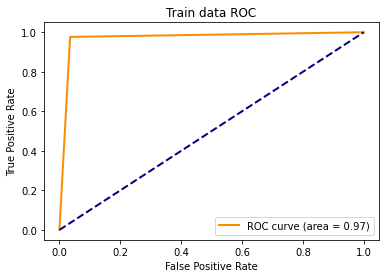


Test confusion matrix:
 [[66  6]
 [ 1 42]]


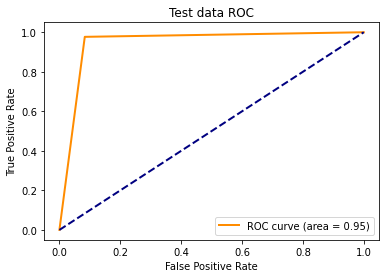

In [252]:
# References: 
# https://stackoverflow.com/questions/23794277/extract-decision-boundary-with-scikit-learn-linear-svm
# https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface
# https://towardsdatascience.com/a-simple-svm-based-implementation-of-semi-supervised-learning-f44eafb0a970
# https://stackoverflow.com/questions/32074239/sklearn-getting-distance-of-each-point-from-decision-boundary
# https://stats.stackexchange.com/questions/167682/getting-distance-of-points-from-decision-boundary-with-linear-svm
# https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/
# https://www.adamsmith.haus/python/answers/how-to-find-the-max-value-of-a-pandas-dataframe-column-in-python

cRange = np.logspace(-1, 7, 5)
parameters = {'C': cRange}
svc_L1 = LinearSVC(penalty='l1', dual=False, max_iter = 100000)
accuracy_train, precision_train, recall_train, F1_score_train, AUC_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, F1_score_test, AUC_test = [], [], [], [], []

for i in range(30):
    # random split and normalize data
    X_train, X_test, y_train, y_test = split_data_1bi()
    X_train = preprocessing.normalize(X_train)
    X_train = pd.DataFrame(X_train)
    X_test = preprocessing.normalize(X_test)
    X_test = pd.DataFrame(X_test)
    
    # select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data.
    # 169 pos data, 285 neg data in the training set.
    # Labeled data, 228 rows in total
    pos_X_train = X_train.iloc[:85, :] # first 85 rows of pos data in X_train
    neg_X_train = X_train.iloc[-143:, :] # last 143 rows of negd data in X_train
    X_train_concat = [pos_X_train, neg_X_train]
    X_train_labeled = pd.concat(X_train_concat)
    
    pos_y_train = y_train.iloc[:85] # first 85 rows of pos data in y_train
    neg_y_train = y_train.iloc[-143:] # last 143 rows of negd data in y_train
    y_train_concat = [pos_y_train, neg_y_train]
    y_train_labeled = pd.concat(y_train_concat)
    
    # Unlabeled data, 226 rows in total
    X_train_unlabeled = X_train.iloc[85: -143, :]
    y_train_unlabeled = y_train.iloc[85: -143]

    
    # A: Train an L1-penalized SVM to classify the labeled data Use normalized data. 
    # Choose the penalty parameter using 5 fold cross validation.
    svc = svm_1biia(svc_L1, parameters, X_train_labeled, y_train_labeled)
    
    # B: Find the unlabeled data point that is the farthest to the decision boundary of the SVM.
    # Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM.
    # Continue this process until all unlabeled data are used.
    svc = unlabel_1biib(svc, X_train_unlabeled, y_train_unlabeled, X_train_labeled, y_train_labeled)

    
    y_pred = pd.DataFrame(svc.predict(X_test))
    y_pred_train = pd.DataFrame(svc.predict(X_train))

    # Record accuracy, precision, recall, F1-score, and AUC, for both training and test sets.
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    precision_train.append(precision_score(y_train, y_pred_train))
    recall_train.append(recall_score(y_train, y_pred_train))
    F1_score_train.append(f1_score(y_train, y_pred_train))
    AUC_train.append(roc_auc_score(y_train, svc.decision_function(X_train)))
    
    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    F1_score_test.append(f1_score(y_test, y_pred))
    AUC_test.append(roc_auc_score(y_test, svc.decision_function(X_test)))
    
    
# print(accuracy_train, precision_train, recall_train, F1_score_train, AUC_train)
# print(accuracy_test, precision_test, recall_test, F1_score_test, AUC_test) 

# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.
print("\nFor train set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_train))
print("Average precision: ", mean(precision_train)) 
print("Average recall: ", mean(recall_train)) 
print("Average F1_score: ", mean(F1_score_train)) 
print("Average AUC: ", mean(AUC_train)) 

print("\nFor test set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_test))
print("Average precision: ", mean(precision_test)) 
print("Average recall: ", mean(recall_test)) 
print("Average F1_score: ", mean(F1_score_test)) 
print("Average AUC: ", mean(AUC_test)) 

# Plot the ROC and report the confusion matrix for training of the last run.
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)  # y_pred_train of the last run
print("\nTrain confusion matrix:\n", conf_matrix)
plot_ROC(y_train, y_pred_train, "Train data ROC")

# Plot the ROC and report the confusion matrix for testing of the last run.
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=y_pred)  # y_pred of the last run
print("\nTest confusion matrix:\n", conf_matrix_test)
plot_ROC(y_test, y_pred, "Test data ROC")

<b>iii. Unsupervised Learning:</b> Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

Reference:
https://stats.stackexchange.com/questions/487160/what-does-it-mean-for-the-k-means-algorithm-to-be-trapped-in-a-local-minimum

Repeat the clustering algorithm multiple times, initialize the algorithm randomly, random seed, and take the most optimal solution.

B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

1. Here we are using k-means as a classifier. The closest 30 data points to each center are labeled by experts, so as to use k-means for classification. Obviously, this is a na ̈ıve approach.

C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.2

2. K-means algorithm does not provide probabilities, so one can use the distances from cluster center and pass them through a softmax to calculate probabilities. Alternatively, one can calculate the ROC curve by varying the threshold for majority polling. Usually, a majority is achieved when t = 50% of the data are in
a class. one can vary t and obtain an ROC curve.


For train set, over 30 runs.
Average accuracy:  0.8810572687224669
Average precision:  0.9752066115702479
Average recall:  0.6982248520710059
Average F1_score:  0.8137931034482758
Average AUC:  0.9898058756358351

For test set, over 30 runs.
Average accuracy:  0.8869565217391304
Average precision:  0.9166666666666666
Average recall:  0.7674418604651163
Average F1_score:  0.8354430379746837
Average AUC:  0.9951550387596899

Train confusion matrix:
 [[282   3]
 [ 51 118]]


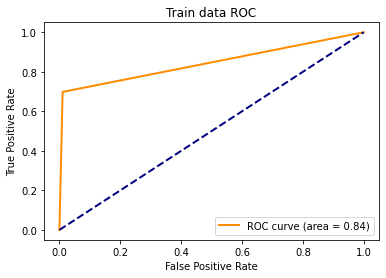


Test confusion matrix:
 [[69  3]
 [10 33]]


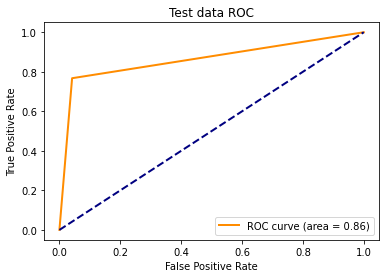

In [253]:
# References: 
# https://www.investopedia.com/terms/m/montecarlosimulation.asp#:~:text=A%20Monte%20Carlo%20simulation%20is,in%20prediction%20and%20forecasting%20models.
# https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789956399/1/ch01lvl1sec05/introduction-to-k-means-clustering
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.hamming.html
# https://realpython.com/k-means-clustering-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
# https://techvidvan.com/tutorials/python-counter/
# https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
# https://www.geeksforgeeks.org/python-flatten-a-2d-numpy-array-into-1d-array/
# https://stackabuse.com/k-means-clustering-with-scikit-learn/
# https://stackoverflow.com/questions/56594598/change-1s-to-0-and-0s-to-1-in-numpy-array-without-looping

accuracy_train, precision_train, recall_train, F1_score_train, AUC_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, F1_score_test, AUC_test = [], [], [], [], []

for i in range(30):
    # random split and normalize data
    X_train, X_test, y_train, y_test = split_data_1bi()
    X_train = preprocessing.normalize(X_train)
    X_train = pd.DataFrame(X_train)
    X_test = preprocessing.normalize(X_test)
    X_test = pd.DataFrame(X_test)
    

    # A: Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly.
    # Make sure that the algorithm was not trapped in a local minimum
    k_means = KMeans(n_clusters=2, init='random', n_init=10)
    k_means.fit(X_train)
        
        
    # B: Compute the centers of the two clusters
    cluster_labels = k_means.labels_
    cluster_centers = k_means.cluster_centers_
    
    # B: find the closest 30 data points to each center.
    # indexes that sort the distance ascendingly.
    cluster0_dist = distance.cdist(X_train, [cluster_centers[0]], 'euclidean')
    cluster1_dist = distance.cdist(X_train, [cluster_centers[1]], 'euclidean')
    
    cluster0_index = np.argsort(cluster0_dist.flatten())[:30] # flatten to 1-d array
    cluster1_index = np.argsort(cluster1_dist.flatten())[:30]
    
    # B: Read the true labels of those 30 data points and take a majority poll within them. 
    # The majority poll becomes the label predicted by k-means for the members of each cluster.
#     cluster0_labels = y_train[cluster0_index]
#     cluster0_labels_cnt = Counter(cluster0_labels)
#     if cluster0_labels_cnt[0] >= cluster0_labels_cnt[1]:
#         label_0 = 0
#     else:
#         label_0 = 1
    
#     cluster1_labels = y_train[cluster1_index]
#     cluster1_labels_cnt = Counter(cluster1_labels)
#     if cluster1_labels_cnt[0] >= cluster1_labels_cnt[1]:
#         label_1 = 0
#     else:
#         label_1 = 1

    cluster0_cnt = y_train[y_train.index[cluster0_index]].value_counts()
    maj_0, maj_0_cnt = cluster0_cnt.index[0], cluster0_cnt.values[0]
#     print(maj_0, maj_0_cnt)
    cluster1_cnt = y_train[y_train.index[cluster1_index]].value_counts() # flatten to 1-d array
    maj_1, maj_1_cnt = cluster1_cnt.index[0], cluster1_cnt.values[0]
#     print(maj_1, maj_1_cnt)
    
    
    # B: compare the labels provided by k-means with the true labels of the training data 
    # and report the average accuracy, precision, recall, F1-score, and AUC over M runs
    if maj_0 == 1 and maj_1 == 0: # swap label 0 and 1
        where_0 = np.where(cluster_labels == 0)
        where_1 = np.where(cluster_labels == 1)
        cluster_labels[where_0] = 1
        cluster_labels[where_1] = 0
    y_pred_train = cluster_labels
    # Record accuracy, precision, recall, F1-score, and AUC, for training sets.
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    precision_train.append(precision_score(y_train, y_pred_train))
    recall_train.append(recall_score(y_train, y_pred_train))
    F1_score_train.append(f1_score(y_train, y_pred_train))
    AUC_train.append(roc_auc_score(y_train, svc.decision_function(X_train)))
    
    
    # C: Classify test data based on their proximity to the centers of the clusters. 
    y_pred = k_means.predict(X_test)
    if maj_0 == 1 and maj_1 == 0: # swap label 0 and 1
        where_0 = np.where(y_pred == 0)
        where_1 = np.where(y_pred == 1)
        y_pred[where_0] = 1
        y_pred[where_1] = 0
    
    # Record accuracy, precision, recall, F1-score, and AUC, for testing sets.
    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    F1_score_test.append(f1_score(y_test, y_pred))
    AUC_test.append(roc_auc_score(y_test, svc.decision_function(X_test)))


# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.
print("\nFor train set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_train))
print("Average precision: ", mean(precision_train)) 
print("Average recall: ", mean(recall_train)) 
print("Average F1_score: ", mean(F1_score_train)) 
print("Average AUC: ", mean(AUC_train)) 

print("\nFor test set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_test))
print("Average precision: ", mean(precision_test)) 
print("Average recall: ", mean(recall_test)) 
print("Average F1_score: ", mean(F1_score_test)) 
print("Average AUC: ", mean(AUC_test)) 

# Plot the ROC and report the confusion matrix for training of the last run.
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)  # y_pred_train of the last run
print("\nTrain confusion matrix:\n", conf_matrix)
plot_ROC(y_train, y_pred_train, "Train data ROC")

# Plot the ROC and report the confusion matrix for testing of the last run.
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=y_pred)  # y_pred of the last run
print("\nTest confusion matrix:\n", conf_matrix_test)
plot_ROC(y_test, y_pred, "Test data ROC")


<b>iv. Spectral Clustering:</b> Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

3. Because Spectral Clustering will not give you cluster centers, instead of considering 30 closest data points
to the center, consider labeling based on either 30 randomly selected data points or the entire points in each cluster. Also, for ROC curves, you can vary the threshold of majority polling to obtain an ROC.

Reference: 
https://en.wikipedia.org/wiki/Spectral_clustering

https://towardsdatascience.com/spectral-clustering-aba2640c0d5b#:~:text=Spectral%20clustering%20is%20a%20technique,non%20graph%20data%20as%20well.

Spectral clustering is a technique with roots in graph theory, where the approach is used to identify communities of nodes in a graph based on the edges connecting them.


For train set, over 30 runs.
Average accuracy:  0.8787812041116005
Average precision:  0.9749929971988796
Average recall:  0.6921104536489152
Average F1_score:  0.8095508137895681
Average AUC:  0.9898058756358351

For test set, over 30 runs.
Average accuracy:  0.6147826086956522
Average precision:  0.5786772486772487
Average recall:  0.6147286821705427
Average F1_score:  0.5952266023062484
Average AUC:  0.9951550387596899

Train confusion matrix:
 [[282   3]
 [ 52 117]]


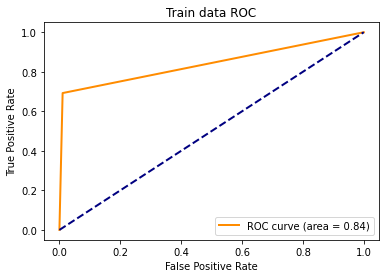


Test confusion matrix:
 [[67  5]
 [ 3 40]]


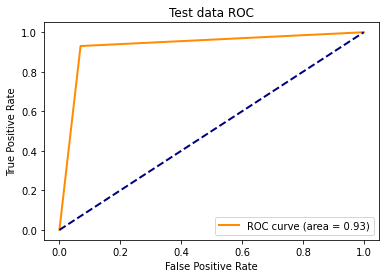

In [266]:
# Reference:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
# https://www.geeksforgeeks.org/ml-spectral-clustering/
# https://www.statology.org/numpy-ndarray-object-has-no-attribute-index/

accuracy_train, precision_train, recall_train, F1_score_train, AUC_train = [], [], [], [], []
accuracy_test, precision_test, recall_test, F1_score_test, AUC_test = [], [], [], [], []

for i in range(30):
    # random split and normalize data
    X_train, X_test, y_train, y_test = split_data_1bi()
    X_train = preprocessing.normalize(X_train)
    X_train = pd.DataFrame(X_train)
    X_test = preprocessing.normalize(X_test)
    X_test = pd.DataFrame(X_test)
    

    # A: Run the algorithm multiple times. Make sure that you initialize the algoritm randomly.
    # Make sure that the algorithm was not trapped in a local minimum
    spectral = SpectralClustering(n_clusters=2, gamma=1, affinity='rbf', n_init=10)
    spectral.fit(X_train)  # fit_predict
    
        
    # B: Compute the centers of the two clusters
    cluster_labels = spectral.labels_
#     cluster_centers = spectral.cluster_centers_
    
    # B: find the closest 30 data points to each center.
    # indexes that sort the distance ascendingly.
    cluster0_index = np.where(cluster_labels==0) #.tolist()
    # get the majority by reading the true labels using index.
    cluster0_cnt = y_train[y_train.index[cluster0_index]].value_counts()
    maj_0, maj_0_cnt = cluster0_cnt.index[0], cluster0_cnt.values[0]
    
    # B: compare the labels provided by k-means with the true labels of the training data 
    # and report the average accuracy, precision, recall, F1-score, and AUC over M runs
    if maj_0 == 1: # swap label 0 and 1
        where_0 = np.where(cluster_labels == 0)
        where_1 = np.where(cluster_labels == 1)
        cluster_labels[where_0] = 1
        cluster_labels[where_1] = 0
    y_pred_train = cluster_labels
    # Record accuracy, precision, recall, F1-score, and AUC, for training sets.
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    precision_train.append(precision_score(y_train, y_pred_train))
    recall_train.append(recall_score(y_train, y_pred_train))
    F1_score_train.append(f1_score(y_train, y_pred_train))
    AUC_train.append(roc_auc_score(y_train, svc.decision_function(X_train)))
    
    
    # C: use fit_predict method. Do not label data based on their proximity to cluster center, 
    # because spectral clustering may give non-convex clusters.
    y_pred = spectral.fit_predict(X_test)
    
    # Record accuracy, precision, recall, F1-score, and AUC, for testing sets.
    accuracy_test.append(accuracy_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    F1_score_test.append(f1_score(y_test, y_pred))
    AUC_test.append(roc_auc_score(y_test, svc.decision_function(X_test)))


# Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over 30 runs.
print("\nFor train set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_train))
print("Average precision: ", mean(precision_train)) 
print("Average recall: ", mean(recall_train)) 
print("Average F1_score: ", mean(F1_score_train)) 
print("Average AUC: ", mean(AUC_train)) 

print("\nFor test set, over 30 runs.")
print("Average accuracy: ", mean(accuracy_test))
print("Average precision: ", mean(precision_test)) 
print("Average recall: ", mean(recall_test)) 
print("Average F1_score: ", mean(F1_score_test)) 
print("Average AUC: ", mean(AUC_test)) 

# Plot the ROC and report the confusion matrix for training of the last run.
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)  # y_pred_train of the last run
print("\nTrain confusion matrix:\n", conf_matrix)
plot_ROC(y_train, y_pred_train, "Train data ROC")

# Plot the ROC and report the confusion matrix for testing of the last run.
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=y_pred)  # y_pred of the last run
print("\nTest confusion matrix:\n", conf_matrix_test)
plot_ROC(y_test, y_pred, "Test data ROC")


v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

According to the average accuracy, precision, recall, F1-score, and AUC over 30 runs for all the mothods mentioned above, supervised learning on the full dataset performs better than semi-supervised learning with half of the dataset labeled and half of the dataset unlabeled, but the difference is not to big. But from the scores for unsupervised learning, it underperforms than the first two methods.

<b>2. Active Learning Using Support Vector Machines</b>

(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [255]:
data = pd.read_csv('../data/data_banknote_authentication.txt', header=None)
X = data.iloc[:,0:4]
y = data[4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472/(900+472))
X_train

,0,1,2,3
1058,-1.56210,-2.21210,4.25910,0.27972
775,-0.36506,2.89280,-3.64610,-3.06030
761,2.25040,3.57570,0.35273,0.28360
30,-0.24811,-0.17797,4.90680,0.15429
949,-3.11580,-8.62890,10.44030,0.97153
...,...,...,...,...
249,1.01350,8.45510,-1.67200,-2.08150
82,5.01850,8.59780,-2.93750,-1.28100
1025,-1.10220,-5.83950,4.56410,0.68705
445,3.18870,-3.41430,2.77420,-0.20260


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

4. How to choose parameter ranges for SVMs? One can use wide ranges for the parameters and a fine grid (e.g. 1000 points) for cross validation; however,this method may be computationally expensive. An alternative way is to train the SVM with very large and very small parameters on the whole training data and find very large and very small parameters for which the training accuracy is not below a threshold (e.g., 70%). Then one can select a fixed number of parameters (e.g., 20) between those points for cross validation. For the penalty parameter, usually one has to consider increments in log(λ). For example, if one found that the accuracy of a support vector machine will not be below 70% for λ = 10−3 and λ = 106, one has to choose log(λ) ∈ {−3, −2, . . . , 4, 5, 6}. For the Gaussian Kernel parameter, one usually chooses linear increments,e.g. σ ∈ {.1, .2, . . . , 2}. When both σ and λ are to be chosen using cross-validation, combinations of very small and very large λ’s and σ’s that keep the accuracy above a threshold (e.g.70%) can be used to determine the ranges for σ and λ. Please note that these are very rough rules of thumb, not general procedures.

In [256]:
# Reference:
# https://www.tutorialspoint.com/generating-random-number-list-in-python
# https://moonbooks.org/Articles/How-to-select-one-or-multiple-rows-in-a-pandas-DataFrame-in-python-/
# https://thispointer.com/create-an-empty-2d-numpy-array-matrix-and-append-rows-or-columns-in-python/

def passive_learning():
    X_t, y_t = X_train, y_train # do not change the original X_train, y_train values.
    svm_X = np.empty((0, 4))
    svm_y = np.array([])
    errors = []
    for _ in range(90):
#         from_same_class = True
#         train_index = X_t.index
#         # If all selected data points are from one class, select another set of 10 data points randomly.
#         while from_same_class:
#             random_index = random.sample(range(0, X_t.shape[0]), 10)
#             classes = y_t.iloc[random_index]
#             c = Counter(classes)
#             if c[0] != 10 and c[1] != 10:
#                 from_same_class = False
        
        # don't need to be sample both classes each time, cuz at the end of the samples, 
        # there will definitely be a set of 10 samples that can only come from one class.
        train_index = X_t.index
        random_index = random.sample(range(0, X_t.shape[0]), 10)
        
        
        X_index = train_index[random_index] # index of dataset that are ramdomly selected  
        svm_X = np.append(svm_X, X_t.iloc[random_index], axis=0)
        svm_y = np.append(svm_y, y_t.iloc[random_index])
        X_t = X_t.drop(X_index)
        y_t = y_t.drop(X_index)
        
        # Train an L1-penalized SVM to classify the data. 
        # Use 5 fold cross-validation to choose the penalty parameter.
        clf = GridSearchCV(svc_L1, parameters, cv=5, n_jobs=-1)
        clf.fit(svm_X, svm_y)
        c = clf.best_params_['C']
        svc = LinearSVC(penalty='l1', C=c, dual=False, max_iter = 10000).fit(svm_X, svm_y)
#         y_pred = pd.DataFrame(svc.predict(X_test))
        errors.append(1-svc.score(X_test, y_test))

    return errors

In [257]:
cRange = np.logspace(-1, 7, 5)
parameters = {'C': cRange}
svc_L1 = LinearSVC(penalty='l1', dual=False, max_iter = 100000)
error_list = []
for i in range(50):
    if i%4 == 0:
        print('Iteration {}'.format(i))
    errors = passive_learning()
    error_list.append(errors)
errors_1 = pd.DataFrame(error_list)

errors_1

Iteration 0
Iteration 4


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

Iteration 8
Iteration 12
Iteration 16


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

Iteration 20
Iteration 24
Iteration 28
Iteration 32
Iteration 36


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

Iteration 40


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

Iteration 44


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

Iteration 48


/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.118644,0.137712,0.036017,0.112288,0.033898,0.033898,0.074153,0.061441,0.055085,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.269068,0.050847,0.040254,0.052966,0.019068,0.038136,0.012712,0.023305,0.016949,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.010593,0.010593,0.010593,0.016949,0.016949,0.010593
2,0.042373,0.042373,0.021186,0.069915,0.076271,0.072034,0.038136,0.042373,0.027542,0.029661,...,0.016949,0.016949,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
3,0.036017,0.042373,0.040254,0.036017,0.025424,0.025424,0.021186,0.031780,0.029661,0.027542,...,0.010593,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.010593,0.010593
4,0.177966,0.095339,0.052966,0.048729,0.048729,0.031780,0.008475,0.019068,0.019068,0.019068,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
5,0.048729,0.027542,0.057203,0.040254,0.040254,0.025424,0.025424,0.027542,0.027542,0.021186,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
6,0.036017,0.063559,0.029661,0.019068,0.016949,0.031780,0.076271,0.031780,0.033898,0.021186,...,0.016949,0.016949,0.016949,0.016949,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.080508,0.093220,0.093220,0.008475,0.016949,0.016949,0.033898,0.008475,0.008475,0.008475,...,0.010593,0.010593,0.012712,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
8,0.146186,0.036017,0.029661,0.048729,0.027542,0.038136,0.027542,0.027542,0.027542,0.023305,...,0.010593,0.012712,0.010593,0.012712,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593
9,0.152542,0.167373,0.118644,0.125000,0.021186,0.021186,0.027542,0.025424,0.027542,0.021186,...,0.016949,0.016949,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


ii. Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

5. If all selected data points are from one class, select another set of 10 data points randomly. 

6. You may use the result from linear algebra about the distance of a point from a hyperplane.

In [258]:
# Reference:
# https://www.geeksforgeeks.org/python-counter-objects-elements/

def active_learning():
    X_t, y_t = X_train, y_train # do not change the original X_train, y_train values.
    svm_X = np.empty((0, 4))
    svm_y = np.array([])
    errors = []
    # choose the first 10 random points.
    from_same_class = True
    train_index = X_t.index
    # If all selected data points are from one class, select another set of 10 data points randomly.
    while from_same_class:
        random_index = random.sample(range(0, X_t.shape[0]), 10)
        classes = y_t.iloc[random_index]
        c = Counter(classes)
        if c[0] != 10 and c[1] != 10:
            from_same_class = False

    X_index = train_index[random_index] # index of dataset that are ramdomly selected  
    svm_X = np.append(svm_X, X_t.iloc[random_index], axis=0)
    svm_y = np.append(svm_y, y_t.iloc[random_index])
    X_t = X_t.drop(X_index)
    y_t = y_t.drop(X_index)

    # Train the initial L1-penalized SVM with the randomly chose 10 data points. 
    # Use 5 fold cross-validation to choose the penalty parameter.
    clf = GridSearchCV(svc_L1, parameters, cv=5, n_jobs=-1)
    clf.fit(svm_X, svm_y)
    c = clf.best_params_['C']
    svc = LinearSVC(penalty='l1', C=c, dual=False, max_iter = 10000).fit(svm_X, svm_y)
#         y_pred = pd.DataFrame(svc.predict(X_test))
    errors.append(1-svc.score(X_test, y_test))
    
    # Choose the 10 closest data points in the training set to the hyperplane of the SVM.
    for _ in range(89):
        train_index = X_t.index
        
        abs_dist = np.abs(svc.decision_function(X_t))
        closest_indexes = np.argsort(abs_dist)[:10]
        
        X_index = train_index[closest_indexes]
        svm_X = np.append(svm_X, X_t.iloc[closest_indexes], axis=0)
        svm_y = np.append(svm_y, y_t.iloc[closest_indexes])
        X_t = X_t.drop(X_index)
        y_t = y_t.drop(X_index)
        
        clf = GridSearchCV(svc_L1, parameters, cv=5, n_jobs=-1)
        clf.fit(svm_X, svm_y)
        c = clf.best_params_['C']
        svc = LinearSVC(penalty='l1', C=c, dual=False, max_iter = 10000).fit(svm_X, svm_y)
        errors.append(1-svc.score(X_test, y_test))

    return errors

In [259]:
cRange = np.logspace(-1, 7, 5)
parameters = {'C': cRange}
svc_L1 = LinearSVC(penalty='l1', dual=False, max_iter = 100000)
error_list = []
for _ in range(50):
    errors = active_learning()
    error_list.append(errors)
errors_2 = pd.DataFrame(error_list)

errors_2

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/aurorawong/opt/anaconda3/lib/python3.9/site-pack

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.125000,0.027542,0.019068,0.012712,0.008475,0.008475,0.008475,0.010593,0.012712,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.088983,0.031780,0.048729,0.012712,0.008475,0.008475,0.008475,0.008475,0.012712,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
2,0.201271,0.150424,0.044492,0.012712,0.069915,0.014831,0.010593,0.010593,0.010593,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
3,0.112288,0.048729,0.033898,0.023305,0.012712,0.012712,0.016949,0.008475,0.008475,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
4,0.177966,0.067797,0.021186,0.029661,0.012712,0.008475,0.008475,0.008475,0.008475,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593
5,0.057203,0.029661,0.080508,0.038136,0.014831,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
6,0.080508,0.050847,0.014831,0.010593,0.012712,0.010593,0.012712,0.027542,0.016949,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.175847,0.040254,0.033898,0.021186,0.021186,0.014831,0.021186,0.010593,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
8,0.322034,0.042373,0.025424,0.014831,0.010593,0.010593,0.012712,0.012712,0.012712,0.012712,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
9,0.118644,0.114407,0.019068,0.008475,0.008475,0.008475,0.008475,0.010593,0.012712,0.012712,...,0.012712,0.010593,0.012712,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

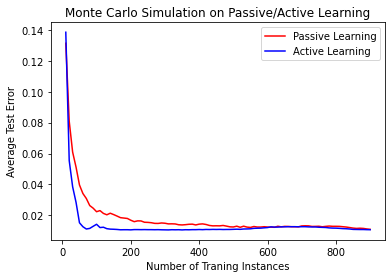

In [267]:
# Reference: 
# https://sparkbyexamples.com/pandas/pandas-get-column-average-mean/#:~:text=To%20get%20column%20average%20or%20mean%20from%20pandas%20DataFrame%20use,values%20for%20the%20requested%20axis.

plt.plot([i*10 for i in range(1,91)], errors_1.mean(axis=0), c='r', label='Passive Learning')
plt.plot([i*10 for i in range(1,91)], errors_2.mean(axis=0), c='b', label='Active Learning')
plt.xlabel('Number of Traning Instances')
plt.ylabel('Average Test Error')
plt.title("Monte Carlo Simulation on Passive/Active Learning")
plt.legend()
plt.show()

We can see from the plot and also the numbers above that, when the number of training instances are getting higher, the error for each simulation is getting to a similar number, no matter which 10 data points it started with. Both active and passive learning test error drops really fast as we are adding more training instances at the beginning, and then gradually converge to a similar number. I expected to see that the active learning outperforms the passive learning, and in this binary case, we can see theat active learning performs a bit better than passive learning when the number of instances are around 50-500.